Saving vgsales.csv to vgsales.csv
Matriz de covarianza:
 [[1.00006139 0.17803821]
 [0.17803821 1.00006139]]
Eigen Vectores:
 [[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]
Eigen Valores:
 [0.82202318 1.1780996 ]
Autovalores en orden descendente:
1.1780995954487241
0.8220231792596855


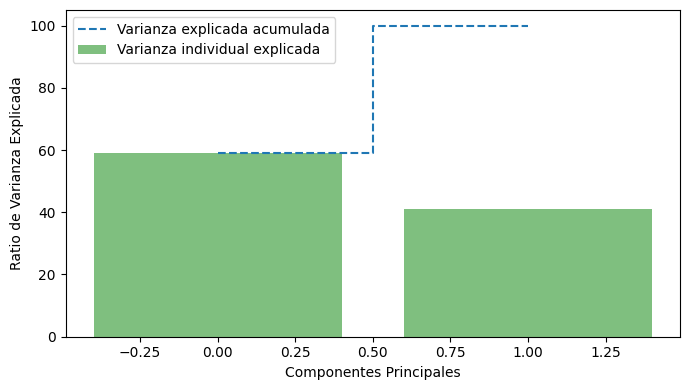

Matriz W:
 [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


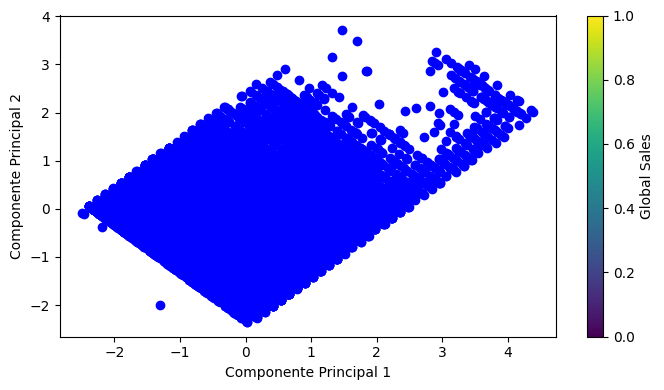

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Asegúrate de que el archivo se haya cargado correctamente
from google.colab import files
import io

# Subir el archivo CSV desde tu computadora
uploaded = files.upload()

# Verificar los nombres de los archivos cargados
filename = list(uploaded.keys())[0]  # Obtener el primer archivo cargado

# Leer el archivo CSV
dato = pd.read_csv(io.BytesIO(uploaded[filename]), on_bad_lines='skip')

# Eliminar datos vacíos o erróneos en la columna 'Global_Sales'
dato.dropna(subset=['Global_Sales'], inplace=True)

# Convertir la columna 'Global_Sales' a tipo numérico
dato['Global_Sales'] = pd.to_numeric(dato['Global_Sales'], errors='coerce')

# Eliminar filas con valores infinitos o NaN en otras columnas
dato = dato.replace([np.inf, -np.inf], np.nan)
dato.dropna(inplace=True)

# Seleccionar las columnas relevantes para X (features) y y (etiquetas)
X = dato[['Year', 'Rank']].values
y = dato['Global_Sales'].values

# Estandarizar los datos (normalización)
X_std = StandardScaler().fit_transform(X)

# Calcular la matriz de covarianza
print('Matriz de covarianza:\n', np.cov(X_std.T))
matriz_cov = np.cov(X_std.T)

# Calcular los autovalores y autovectores
eig_vals, eig_vecs = np.linalg.eig(matriz_cov)

print('Eigen Vectores:\n', eig_vecs)
print('Eigen Valores:\n', eig_vals)

# Reducción de dimensionalidad del dataset
eig_par = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]

# Ordenar los eigen valores en orden descendente
eig_par.sort(key=lambda x: x[0], reverse=True)

print('Autovalores en orden descendente:')
for i in eig_par:
    print(i[0])

# Calcular la varianza explicada
tot = sum(eig_vals)
var_exp = [(i / tot) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Gráfico de la varianza explicada
plt.figure(figsize=(7, 4))

plt.bar(range(2), var_exp, alpha=0.5, align='center',
        label='Varianza individual explicada', color='g')
plt.step(range(2), cum_var_exp, where='mid', linestyle='--', label='Varianza explicada acumulada')
plt.ylabel('Ratio de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Generar la matriz a partir de los pares autovalor-autovector
matriz_w = np.hstack((eig_par[0][1].reshape(2, 1),
                      eig_par[1][1].reshape(2, 1)))
print('Matriz W:\n', matriz_w)

# Proyección de los datos en el espacio de las componentes principales
Y = X_std.dot(matriz_w)

# Gráfico de los datos proyectados
plt.figure(figsize=(7, 4))
plt.scatter(Y[:, 0], Y[:, 1], c='blue')  # Cambiar el color de los puntos a rojo
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Global Sales')
plt.tight_layout()
plt.show()
